Mean Squared Error: 7595.98


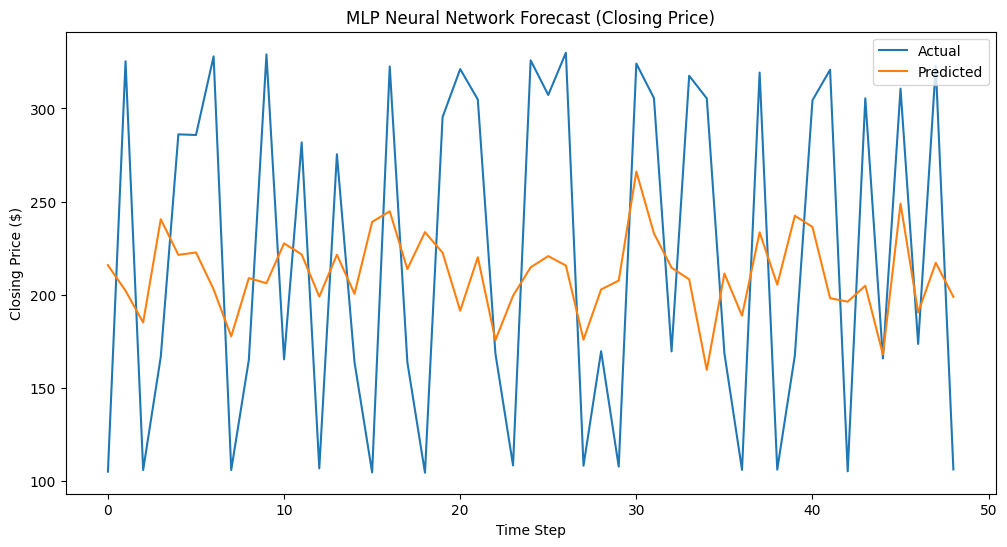

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess data
df = pd.read_csv("/content/dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)

# Normalize closing price
scaler = MinMaxScaler()
df["scaled_close"] = scaler.fit_transform(df[["Close"]])

# Create sequences
def create_sequences(data, window_size=7):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(df["scaled_close"].values)

# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train MLP model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predict and inverse transform
predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse = mean_squared_error(actual_values, predicted_values)
print(f"Mean Squared Error: {mse:.2f}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('MLP Neural Network Forecast (Closing Price)')
plt.xlabel('Time Step')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()
